In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='ElectricDevices'

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [9]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

# Explanation Algo

In [10]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [11]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST
from TSInterpret.InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [12]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(model_to_explain,(test_x, test_y),mode='time',backend='TF')
#,'straight_line',segmentator,,learning_process_name

In [13]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size,transform_name='mean',learning_process_name='SHAP')

(7711, 96, 1)
241/241 [==============================] - 0s 1ms/step
(1, 96, 1)
1/1 [==============================] - 0s 14ms/step
(1000, 96, 1)
32/32 [==============================] - 0s 1ms/step


time mode
(1, 96)
(1, 96)
0


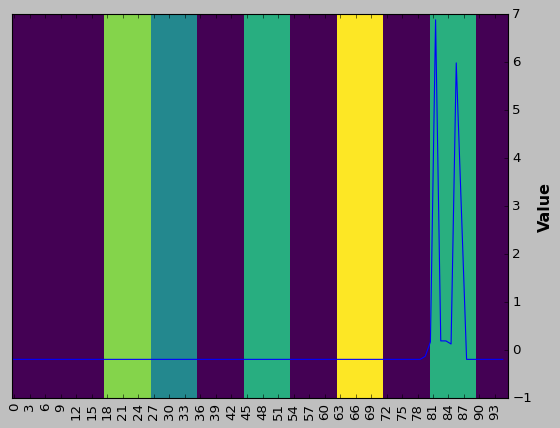

In [14]:
leftist.plot(np.array([explained_instance]), np.array([explanations[0]]))